In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

In [2]:
df=pd.read_csv('data/secondary_data.csv',sep=';')
print(df)

      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [4]:
df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [5]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


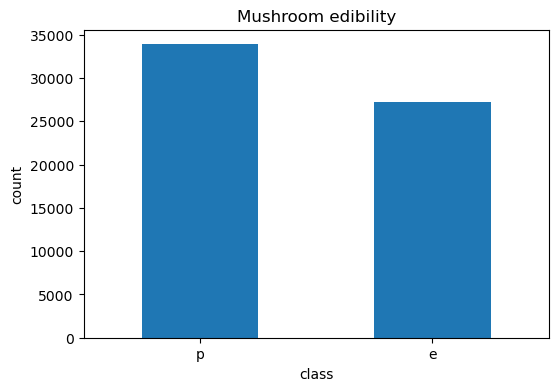

In [4]:
plt.figure(figsize=(6,4))
pd.value_counts(df['class']).plot.bar()
plt.xlabel('class')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.title('Mushroom edibility')
plt.savefig('Target',dpi=300)

In [7]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [5]:
import seaborn as sns 
sns.set_palette(sns.color_palette(['cornflowerblue','darkorange']))

In [7]:
plt.figure(figsize=(6,4))

df['cap-diameter'].plot.hist(bins=20) 
plt.xlabel('cap-diameter')
plt.ylabel('count')
plt.savefig('cap-diameter',dpi=300)
plt.close()

In [10]:
f, ax = plt.subplots(figsize=(6,4))
x_capdia=df[df['cap-diameter']<25]
sns.histplot(x='cap-diameter', data = x_capdia, hue='class')
plt.savefig('cap-diameter1',dpi=300)
plt.close()

In [9]:
f, ax = plt.subplots(figsize=(6,4))
sns.histplot(x='stem-height', data = df, hue='class')
plt.savefig('cap-diameter',dpi=300)
plt.close()

In [12]:
f, ax = plt.subplots(figsize=(6,4))
sns.histplot(x='stem-width', data = df, hue='class')
plt.savefig('width',dpi=300)
plt.close()

In [13]:
count_matrix = df.groupby(['cap-shape', 'class']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(6,4))
plt.xticks(rotation=0)
plt.ylabel('fraction of cap-shape in group')
plt.legend(loc=4)
plt.savefig('cap-shape',dpi=300)
plt.close()

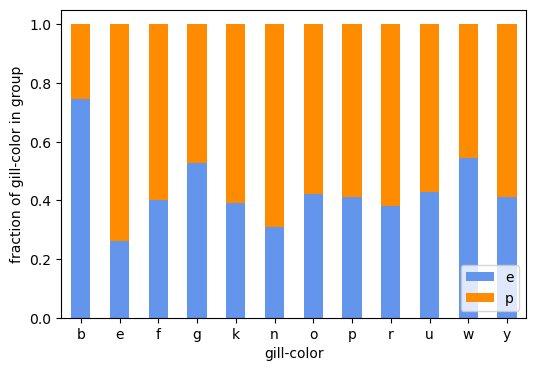

In [14]:
count_matrix = df.groupby(['gill-color', 'class']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(6,4))
plt.xticks(rotation=0)
plt.ylabel('fraction of gill-color in group')
plt.legend(loc=4)
plt.show()

In [14]:
count_matrix = df.groupby(['season', 'class']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(6,4))
plt.xticks(rotation=0)
plt.ylabel('fraction of season in group')
plt.legend(loc=4)
plt.savefig('season',dpi=300)
plt.close()

In [3]:
dataset = [df[df['class']=='p']['cap-diameter'].values,
           df[df['class']=='e']['cap-diameter'].values]

plt.figure(figsize=(5,4))

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['p','e'])
plt.ylabel('cap-diameter')
plt.savefig('EDA1.png', dpi=300)
plt.close()

In [4]:
dataset = [df[df['class']=='p']['stem-height'].values,
           df[df['class']=='e']['stem-height'].values]

plt.figure(figsize=(5,4))

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['p','e'])
plt.ylabel('stem-height')
plt.savefig('EDA2.png', dpi=300)
plt.close()

In [5]:
dataset = [df[df['class']=='p']['stem-width'].values,
           df[df['class']=='e']['stem-width'].values]

plt.figure(figsize=(5,4))

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['p','e'])
plt.ylabel('stem-width')
plt.savefig('EDA3.png', dpi=300)
plt.close()

In [3]:
y=df['class']
print(y.value_counts())

class
p    33888
e    27181
Name: count, dtype: int64


In [4]:
X=df.drop(columns=['class'])

In [34]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['class'])

random_state = 4
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

print('training set of y:',np.unique(y_train,return_counts=True))
print('validation set of y:',np.unique(y_val,return_counts=True))
print('test set of y:',np.unique(y_test,return_counts=True))

print('training set of X:',X_train.shape)
print('validation set of X:',X_val.shape)
print('test set of X:',X_test.shape)

training set of y: (array(['e', 'p'], dtype=object), array([16260, 20381], dtype=int64))
validation set of y: (array(['e', 'p'], dtype=object), array([5404, 6810], dtype=int64))
test set of y: (array(['e', 'p'], dtype=object), array([5517, 6697], dtype=int64))
training set of X: (36641, 20)
validation set of X: (12214, 20)
test set of X: (12214, 20)


In [21]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (61069, 21)
fraction of missing values in features:
cap-surface          0.231214
gill-attachment      0.161850
gill-spacing         0.410405
stem-root            0.843931
stem-surface         0.624277
veil-type            0.947977
veil-color           0.878613
ring-type            0.040462
spore-print-color    0.895954
dtype: float64
data types of the features with missing values:
cap-surface          object
gill-attachment      object
gill-spacing         object
stem-root            object
stem-surface         object
veil-type            object
veil-color           object
ring-type            object
spore-print-color    object
dtype: object
fraction of points with missing values: 1.0


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

print('Before preprocessing:',X.shape)

random_state = 42
cat_ftrs = X.drop(columns=['cap-diameter', 'stem-height', 'stem-width']).columns
num_ftrs=['cap-diameter', 'stem-height', 'stem-width']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])

X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print('After preprocessing:')
print(df_train.shape)

# transform the val
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names)
print(df_val.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

Before preprocessing: (61069, 20)
After preprocessing:
(36641, 128)
(12214, 128)
(12214, 128)
['num__cap-diameter' 'num__stem-height' 'num__stem-width'
 'cat__cap-shape_b' 'cat__cap-shape_c' 'cat__cap-shape_f'
 'cat__cap-shape_o' 'cat__cap-shape_p' 'cat__cap-shape_s'
 'cat__cap-shape_x' 'cat__cap-surface_d' 'cat__cap-surface_e'
 'cat__cap-surface_g' 'cat__cap-surface_h' 'cat__cap-surface_i'
 'cat__cap-surface_k' 'cat__cap-surface_l' 'cat__cap-surface_missing'
 'cat__cap-surface_s' 'cat__cap-surface_t' 'cat__cap-surface_w'
 'cat__cap-surface_y' 'cat__cap-color_b' 'cat__cap-color_e'
 'cat__cap-color_g' 'cat__cap-color_k' 'cat__cap-color_l'
 'cat__cap-color_n' 'cat__cap-color_o' 'cat__cap-color_p'
 'cat__cap-color_r' 'cat__cap-color_u' 'cat__cap-color_w'
 'cat__cap-color_y' 'cat__does-bruise-or-bleed_f'
 'cat__does-bruise-or-bleed_t' 'cat__gill-attachment_a'
 'cat__gill-attachment_d' 'cat__gill-attachment_e'
 'cat__gill-attachment_f' 'cat__gill-attachment_missing'
 'cat__gill-attachment_p

In [24]:
df_prep=pd.concat([df_train,df_val,df_test])
print(df_prep.isnull().sum())

num__cap-diameter    0
num__stem-height     0
num__stem-width      0
cat__cap-shape_b     0
cat__cap-shape_c     0
                    ..
cat__habitat_w       0
cat__season_a        0
cat__season_s        0
cat__season_u        0
cat__season_w        0
Length: 128, dtype: int64


In [25]:
pearson = X[['cap-diameter', 'stem-height', 'stem-width']].corr(method='pearson', min_periods=1, numeric_only=False)
pearson

,cap-diameter,stem-height,stem-width
cap-diameter,1.00000,0.422560,0.695330
stem-height,0.42256,1.000000,0.436117
stem-width,0.69533,0.436117,1.000000


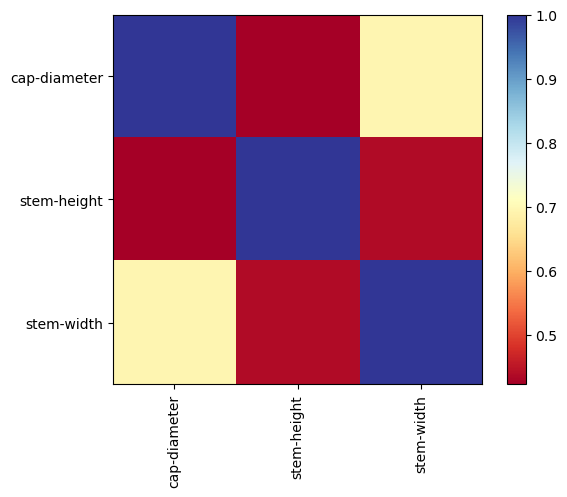

<Figure size 600x400 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
plt.imshow(pearson, cmap ="RdYlBu") 
plt.colorbar() 
plt.xticks(range(len(pearson)), pearson.columns,rotation=90) 
plt.yticks(range(len(pearson)), pearson.index) 
plt.figure(figsize=(6,4))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [23]:
def SVC_pipeline_kfold(X, y):
    test_scores = []
    best_models = []
    # create the pipeline: preprocessor + supervised ML method
    cat_ftrs = X.drop(columns=['cap-diameter', 'stem-height', 'stem-width']).columns
    num_ftrs=['cap-diameter', 'stem-height', 'stem-width']
        
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
        
    preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, num_ftrs),
                ('cat', categorical_transformer, cat_ftrs)])
    pipe = make_pipeline(preprocessor, SVC())
    # the parameter(s) we want to tune
    param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100],
                      'svc__gamma': [0.01, 0.1, 1, 10, 100]}
    for i in range(10):
        random_state = 2*i
        n_folds = 4
        # create a test set
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
        # splitter for _other
        kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
       
        # prepare gridsearch
        grid = GridSearchCV(pipe, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
        # do kfold CV on _other
        grid.fit(X_other, y_other)
        test_scores.append(grid.score(X_test, y_test))
        best_models.append(grid.best_estimator_)
    return grid, X_test, y_test, test_scores, best_models

In [26]:
model1, X_test1, y_test1, test_scores1, best_models1 = SVC_pipeline_kfold(X, y)
mean1=np.mean(test_scores1)
std1=np.std(test_scores1)
print('mean of the test scores:', mean1)
print('standard deviation of the test scores:', std1)

mean of the test scores: 0.990444346
standard deviation of the test scores: 0.002100800391323259


In [40]:
def RandomForest_pipeline_kfold(X, y):
    test_scores = []
    best_models = []
    # create the pipeline: preprocessor + supervised ML method
    cat_ftrs = X.drop(columns=['cap-diameter', 'stem-height', 'stem-width']).columns
    num_ftrs=['cap-diameter', 'stem-height', 'stem-width']
    
    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])
    pipe = make_pipeline(preprocessor,RandomForestClassifier())
    # the parameter(s) we want to tune
    param_grid = {
                  'randomforestclassifier__max_depth': [1, 10, 30, 100, 300], 
                  'randomforestclassifier__max_features': [0.25, 0.5, 0.75, 1]
                  } 
    
    for i in range(10):
        random_state = 2*i
        n_folds = 4
        # create a test set
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
        # splitter for _other
        kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
        
        # prepare gridsearch
        grid = GridSearchCV(pipe, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
        # do kfold CV on _other
        grid.fit(X_other, y_other)
        test_scores.append(grid.score(X_test, y_test))
        best_models.append(grid.best_estimator_)
    return grid, X_test, y_test, test_scores, best_models

In [22]:
model2, X_test2, y_test2, test_scores2, best_models2 = RandomForest_pipeline_kfold(X, y)
mean2=np.mean(test_scores2)
std2=np.std(test_scores2)
print('mean of the test scores:', mean2)
print('standard deviation of the test scores:', std2)

mean of the test scores: 1.0
standard deviation of the test scores: 0.0


In [42]:
best_models2

[Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('scaler',
                                                                    StandardScaler())]),
                                                   ['cap-diameter',
                                                    'stem-height',
                                                    'stem-width']),
                                                  ('cat',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(fill_value='missing',
                                                                                  strategy='constant')),
                                                                   ('onehot',
                                                                    OneHotEncoder(handle_unknown='ignore',
  

In [23]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

def logistic_regression_pipeline_kfold(X, y):
    test_scores = []
    best_models = []
    # create the pipeline: preprocessor + logistic regression
    cat_ftrs = X.drop(columns=['cap-diameter', 'stem-height', 'stem-width']).columns
    num_ftrs = ['cap-diameter', 'stem-height', 'stem-width']
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])
    pipe = make_pipeline(preprocessor, LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000))
    
    # parameter tuning
    param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                  'logisticregression__l1_ratio':[0.25, 0.5, 0.75, 1]
                 }
    
    for i in range(10):
        random_state = 2*i
        n_folds = 4
        # create a test set
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        # splitter for _other
        kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state)
       
        grid = GridSearchCV(pipe, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
        
        # do kfold CV on _other
        grid.fit(X_other, y_other)
        test_scores.append(grid.score(X_test, y_test))
        best_models.append(grid.best_estimator_)
    return grid, X_test, y_test, test_scores, best_models

In [ ]:
model3, X_test3, y_test3, test_scores3, best_models3 = logistic_regression_pipeline_kfold(X, y)
mean3=np.mean(test_scores3)
std3=np.std(test_scores3)
print('mean of the test scores:', mean3)
print('standard deviation of the test scores:', std3)

In [11]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

def knn_pipeline_kfold(X, y):
    test_scores = []
    best_models = []
    # create the pipeline: preprocessor + KNN
    cat_ftrs = X.drop(columns=['cap-diameter', 'stem-height', 'stem-width']).columns
    num_ftrs = ['cap-diameter', 'stem-height', 'stem-width']
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])
    pipe = make_pipeline(preprocessor, KNeighborsClassifier())
    
    # parameter tuning
    param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11],
                  'kneighborsclassifier__weights': ['uniform', 'distance']}
    
    for i in range(10):
        random_state = 2*i
        n_folds = 4
        # create a test set
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        # splitter for _other
        kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state)
        
        grid = GridSearchCV(pipe, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
        
        # do kfold CV on _other
        grid.fit(X_other, y_other)
        test_scores.append(grid.score(X_test, y_test))
        best_models.append(grid.best_estimator_)
    return grid, X_test, y_test, test_scores, best_models

In [12]:
model4, X_test4, y_test4, test_scores4, best_models4 = knn_pipeline_kfold(X, y)
mean4=np.mean(test_scores4)
std4=np.std(test_scores4)
print('mean of the test scores:', mean4)
print('standard deviation of the test scores:', std4)

mean of the test scores: 1.0
standard deviation of the test scores: 0.0


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model4.predict(X_test4)
cm = confusion_matrix(y_test4,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['poisonous', 'edible'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.savefig('cm.png', dpi=300)
plt.close()

In [20]:
mean4=np.mean(test_scores4)
std4=np.std(test_scores4)
print('mean of the test scores:', mean4)
print('standard deviation of the test scores:', std4)

mean of the test scores: 1.0
standard deviation of the test scores: 0.0


In [52]:
print(best_models4)

[Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
              

In [29]:
baseline4 = np.sum(y_test4 == 'p')/len(y_test4)
print('test baseline = ', baseline4)

test baseline =  0.5659079744555429


In [29]:
import matplotlib.pyplot as plt
import numpy as np

scores = [test_scores1, test_scores2, test_scores3, test_scores4]

plt.figure(figsize=(10, 6))
plt.boxplot(scores, vert=True, patch_artist=True)
plt.title('Boxplot of Different Test Scores')
plt.ylabel('Scores')
plt.xticks([1, 2, 3, 4], ['SVC', 'Random Forest', 'Logistic Regression', 'KNeighbors'])
plt.axhline(y=baseline4, color='r', linestyle='--', label=f'Baseline Score: {baseline4}')
plt.legend()
plt.savefig('score.png', dpi=300)
plt.close()

In [6]:
# create the pipeline: preprocessor + KNN
cat_ftrs = X.drop(columns=['cap-diameter', 'stem-height', 'stem-width']).columns
num_ftrs = ['cap-diameter', 'stem-height', 'stem-width']
    
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])

X_prep = preprocessor.fit_transform(X)
# little hacky, but collect feature names
feature_names = preprocessor.get_feature_names_out()


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=0)

X_prep = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()
df_train = pd.DataFrame(data=X_prep,columns=feature_names)

# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn.fit(df_train,y_train)
np.random.seed(42)

nr_runs = 6
scores = np.zeros([len(feature_names),nr_runs])

test_score = 1

df_test_sample, y_test_sample = resample(df_test, y_test, n_samples=1000)
# loop through the features
for i in range(len(feature_names)):
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = df_test_sample.copy()
        X_test_shuffled[feature_names[i]] = np.random.permutation(df_test_sample[feature_names[i]].values)
        y_test_pred_shuffled = knn.predict(X_test_shuffled)
        acc_scores.append(accuracy_score(y_test_sample,y_test_pred_shuffled))
    scores[i] = acc_scores

In [39]:
import matplotlib.pylab as plt
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10,6))
plt.boxplot(scores[sorted_indcs].T,labels=feature_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Perturbation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('perturbation.png', dpi=300)
plt.close()

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=0)

X_prep = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()
df_train = pd.DataFrame(data=X_prep,columns=feature_names)

# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn.fit(df_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
import shap

background = shap.sample(df_train, 100)  

explainer = shap.KernelExplainer(knn.predict_proba, background)

sample_indices = np.random.choice(df_test.index, 10, replace=False)  
X_test_sample = df_test.loc[sample_indices]

shap_values = explainer.shap_values(X_test_sample)

shap_summary = np.sum(np.abs(shap_values[1]),axis=0)+np.sum(np.abs(shap_values[0]),axis=0)
indcs = np.argsort(shap_summary)
shap_summary[indcs]
plt.figure(figsize=(6,4))
plt.barh(feature_names[indcs[-10:]],shap_summary[indcs[-10:]])
plt.xlabel('mean(|SHAP value|)')
plt.title('feature importance by shap')
plt.show()

In [21]:
shap_summary = np.sum(np.abs(shap_values[1]),axis=0)+np.sum(np.abs(shap_values[0]),axis=0)
indcs = np.argsort(shap_summary)
shap_summary[indcs]
plt.figure(figsize=(12,6))
plt.barh(feature_names[indcs[-10:]],shap_summary[indcs[-10:]])
plt.xlabel('mean(|SHAP value|)')
plt.title('feature importance by shap')
plt.savefig('shap.png', dpi=300)
plt.close()

In [36]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_test)

model = xgb.XGBClassifier()
model.fit(df_test, y_encoded)

feature_importance_weight = model.get_booster().get_score(importance_type='gain')

In [37]:
indices = np.argsort(feature_importance)[::-1]
top_10_indices = indices[:10][::-1]
top_10_importances = feature_importance[top_10_indices]
top_10_features = [feature_names[i] for i in top_10_indices]

In [39]:
plt.figure(figsize=(12, 6))
plt.barh(top_10_features, top_10_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance')
plt.savefig('xgboost',dpi=300)
plt.close()

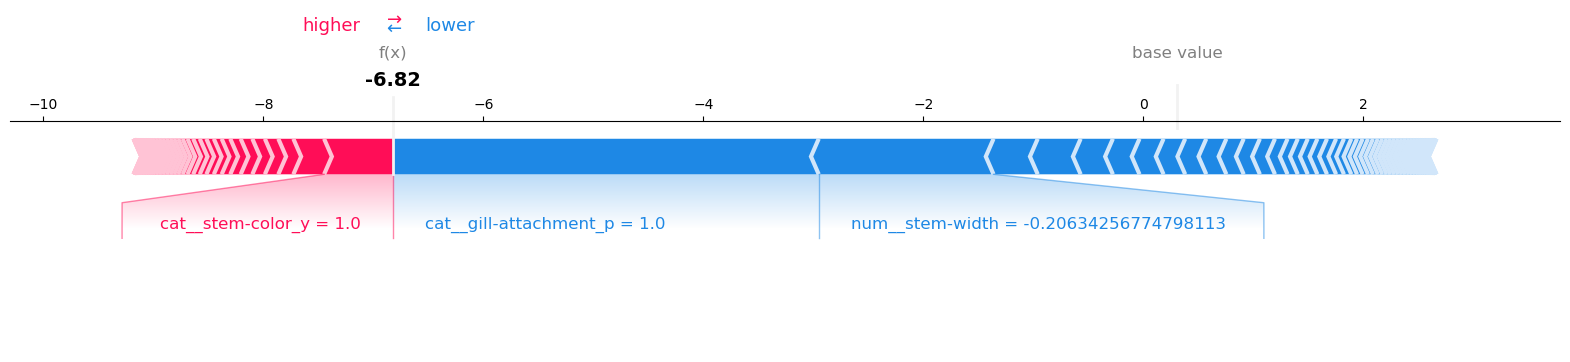

In [45]:
import shap
explainer = shap.TreeExplainer(model)
specific_data_points = df_test.iloc[[0, 100, 200]]
specific_shap_values = explainer.shap_values(specific_data_points)
# Create force plots for each data point
shap.force_plot(explainer.expected_value, specific_shap_values[0,:], specific_data_points.iloc[0,:], matplotlib=True, link='identity')
plt.savefig('local1',dpi=300)
plt.close()

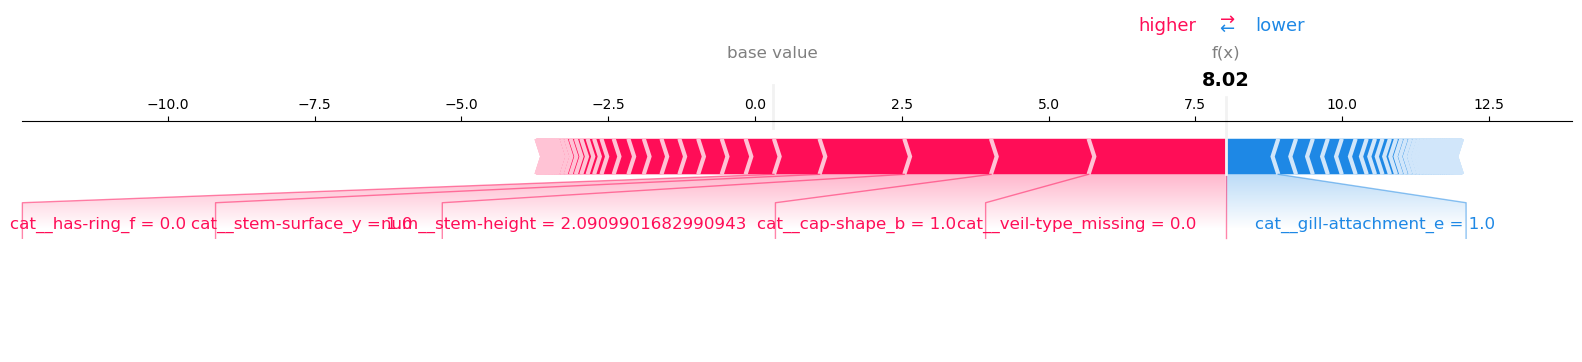

In [43]:
shap.force_plot(explainer.expected_value, specific_shap_values[1,:], specific_data_points.iloc[1,:], matplotlib=True, link='identity')

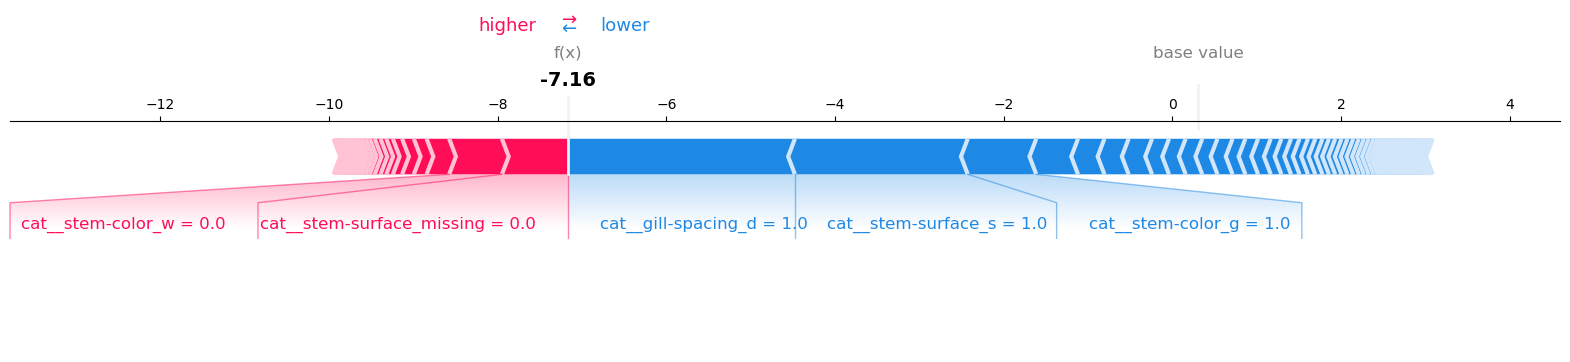

In [44]:
shap.force_plot(explainer.expected_value, specific_shap_values[2,:], specific_data_points.iloc[2,:], matplotlib=True, link='identity')